In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# House_price predictions
> 112-1 ML introdction
## Data processing

In [2]:
# read data
df=pd.read_csv("Housing_Dataset_Sample.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


c:\Users\user\ML\.ml-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\ML\.ml-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\ML\.ml-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\ML\.ml-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.ty

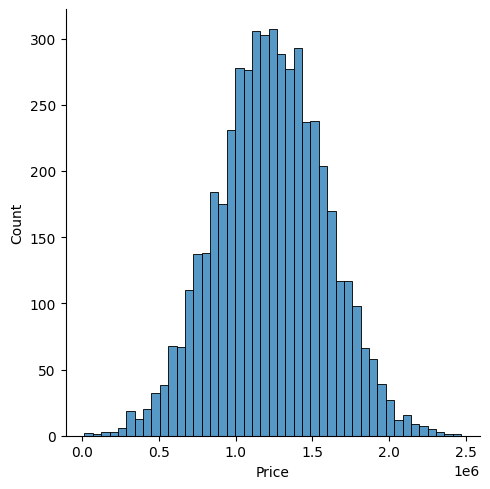

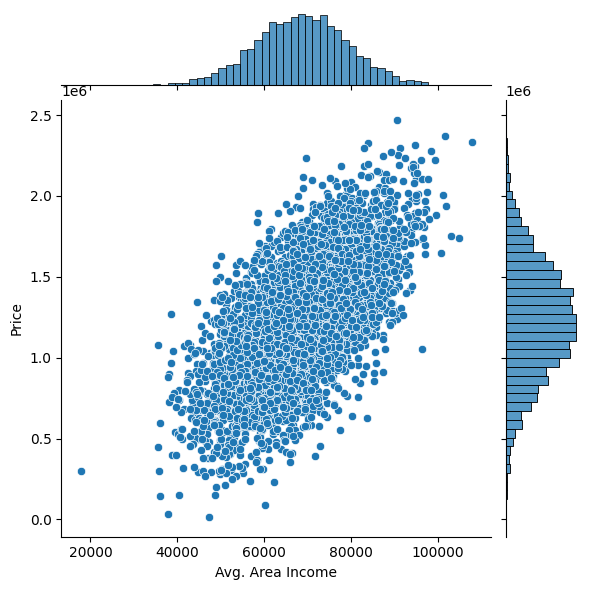

In [3]:
# check data
df=pd.read_csv('Housing_Dataset_Sample.csv')
df.head(n=6)
df.info()
df.describe().T
sns.displot(df['Price'])
sns.jointplot(x=df['Avg. Area Income'],y=df['Price'])

# sns.pairplot(df)

In [4]:
# Assign x (selected column of properties) and y (price)
x=df.iloc[:,:5]
y=df['Price']

In [50]:
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [5]:
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [6]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

## Linear Regression
使用線性回歸作為 model，並針對可調整之參數 test_size 與 random_state 做調整\
利用迴圈的方式測驗不同參數的變化，並將score的最大值與對應參數值儲存下來\
結果如 output 所示:\
在 test_size = 0.2, random_state = 76時，有最大準確度 0.9277721466

Max_score = 0.9277721466594443 : test_size = 0.2 , random_state = 76


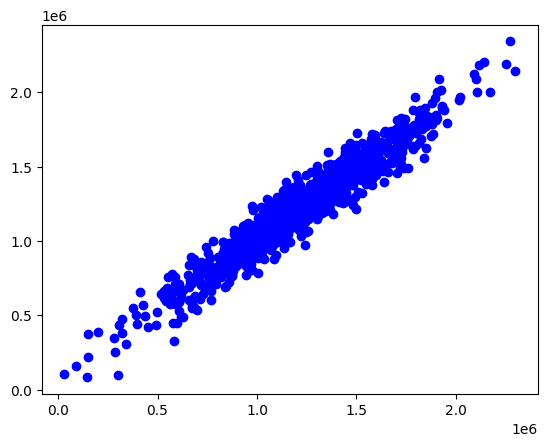

In [12]:
# Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
max_score=0;max_size=0;max_random=0
for i in np.arange(0.2,1,0.01):
    for j in range(0,100):
        X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=i,random_state=j)
        reg = LinearRegression()
        reg.fit(X_train,y_train)
        predictions=reg.predict(X_test)
        score = r2_score(y_test,predictions)
        if score > max_score:
            max_score=score
            max_random=j
            max_size=i
print('Max_score = {} : test_size = {:3} , random_state = {}'.format(max_score,max_size,max_random))
# Best parameters pair
X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=max_size,random_state=max_random)
reg.fit(X_train,y_train)
predictions=reg.predict(X_test)
plt.scatter(y_test,predictions,color='blue')

## 使用其他模型
參考講義上的圖，由題目分類過濾找方法，選擇了3種適用於此問題的模型:
- Ridge regression
- Lasso
- ElasticNet
![ref](https://static.coderbridge.com/img/techbridge/images/kdchang/data-science101/scikit-learn/scikit-learn-map.png)

### Ridge regression
使用Ridge作為 model，並針對 dataset 可調整之參數 test_size 與 random_state 做調整。
> 針對scikit_learn的參數表進行手動調整，發現 alpha 更動造成的變化較顯著，故針對alpha進行參數調整

> 在data的test_size與random_state固定下，得到alpha=0.1有最佳的表現


一樣使用迴圈的方式測驗不同參數的變化，結果如 output 所示:
在 test_size = 0.2, random_state = 76 時有最大準確度，

但固定這兩數值後跑了數次，準確度都有些微不同，但都大約落在 0.927777。

Max_score = 0.9277720322254424 : test_size = 0.2 , random_state = 76


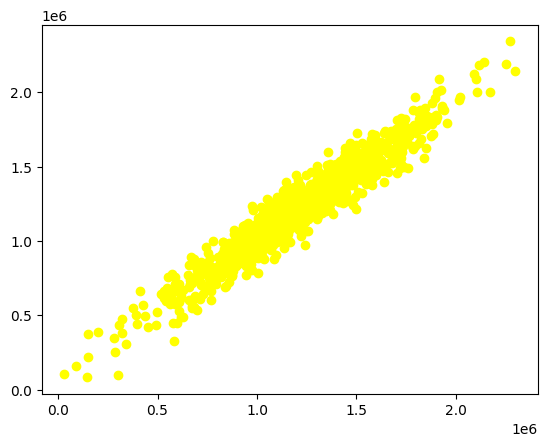

In [13]:
# Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
max_score=0;max_size=0;max_random=0
for i in np.arange(0.2,1,0.01):
    for j in range(0,100):
        X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=i,random_state=j)
        rid = Ridge(alpha=1)
        rid.fit(X_train,y_train)
        predictions=rid.predict(X_test)
        score = r2_score(y_test,predictions)
        if score > max_score:
            max_score=score
            max_random=j
            max_size=i
print('Max_score = {} : test_size = {:3} , random_state = {}'.format(max_score,max_size,max_random))
# Best parameters pair
X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=max_size,random_state=max_random)
rid.fit(X_train,y_train)
predictions=rid.predict(X_test)
plt.scatter(y_test,predictions,color='yellow')

In [56]:
# parameter test
X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=76)
for a in np.arange(0.1,1,0.05):
    rid = Ridge(alpha=a)
    rid.fit(X_train,y_train)
    predictions=rid.predict(X_test)
    score = r2_score(y_test,predictions)
    print('{:.2f} : {}'.format(a,score))

0.10 : 0.9277721373495432
0.15 : 0.9277721325167114
0.20 : 0.927772127565305
0.25 : 0.9277721224953348
0.30 : 0.9277721173068116
0.35 : 0.927772111999746
0.40 : 0.9277721065741489
0.45 : 0.927772101030031
0.50 : 0.9277720953674032
0.55 : 0.9277720895862761
0.60 : 0.9277720836866605
0.65 : 0.9277720776685673
0.70 : 0.9277720715320071
0.75 : 0.9277720652769906
0.80 : 0.9277720589035289
0.85 : 0.9277720524116323
0.90 : 0.9277720458013119
0.95 : 0.9277720390725783


### Lasso
使用 Lasso作為 model，並針對 dataset 可調整之參數 test_size 與 random_state 做調整。
> 針對scikit_learn的參數表進行手動調整，發現 alpha 更動造成的變化較顯著，故針對alpha進行參數調整

> 在data的test_size與random_state固定下，得到alpha=0.1有最佳的表現


一樣使用迴圈的方式測驗不同參數的變化，結果如 output 所示:
在 test_size = 0.2, random_state = 76時，有最大準確度，

約略落在 0.9277772，與 Linear Regression 相似

Max_score = 0.9277721462134839 : test_size = 0.2 , random_state = 76


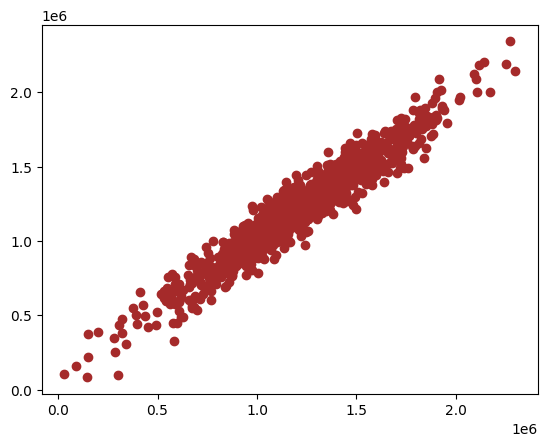

In [14]:
# Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
max_score=0;max_size=0;max_random=0
for i in np.arange(0.2,1,0.01):
    for j in range(0,100):
        X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=i,random_state=j)
        las = Lasso(alpha=0.1)
        las.fit(X_train,y_train)
        predictions=las.predict(X_test)
        score = r2_score(y_test,predictions)
        if score>max_score:
            max_score=score
            max_random=j
            max_size=i
print('Max_score = {} : test_size = {:3} , random_state = {}'.format(max_score,max_size,max_random))# Best parameters pair
X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=max_size,random_state=max_random)
las.fit(X_train,y_train)
predictions=las.predict(X_test)
plt.scatter(y_test,predictions,color='brown')

In [54]:
X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=76)
for a in np.arange(0.1,1,0.05):
    las = Lasso(alpha=a)
    las.fit(X_train,y_train)
    predictions=las.predict(X_test)
    score = r2_score(y_test,predictions)
    print('{:.2f} : {}'.format(a,score))

0.10 : 0.9277721462134839
0.15 : 0.9277721459886175
0.20 : 0.9277721457636633
0.25 : 0.9277721455386214
0.30 : 0.9277721453134917
0.35 : 0.9277721451010298
0.40 : 0.9277721448757249
0.45 : 0.9277721446503322
0.50 : 0.9277721444248518
0.55 : 0.9277721441992836
0.60 : 0.9277721439736276
0.65 : 0.927772143747884
0.70 : 0.9277721435220526
0.75 : 0.9277721432961334
0.80 : 0.9277721430701267
0.85 : 0.927772142844032
0.90 : 0.9277721426178496
0.95 : 0.9277721423915795


### ElasticNet
使用 ElasticNet 作為 model，並針對 dataset 可調整之參數 test_size 與 random_state 做調整。
> 針對scikit_learn的參數表進行手動調整，發現 alpha 更動造成的變化較顯著，故針對alpha進行參數調整

> 在data的test_size與random_state固定下，得到alpha=0.1有最佳的表現


一樣使用迴圈的方式測驗不同參數的變化，結果如 output 所示:
在 test_size = 0.2, random_state = 76時，有最大準確度，
約略在 0.926，較以上三種 model 低了一些。

Max_score = 0.9269098708570991 : test_size = 0.2 , random_state = 76


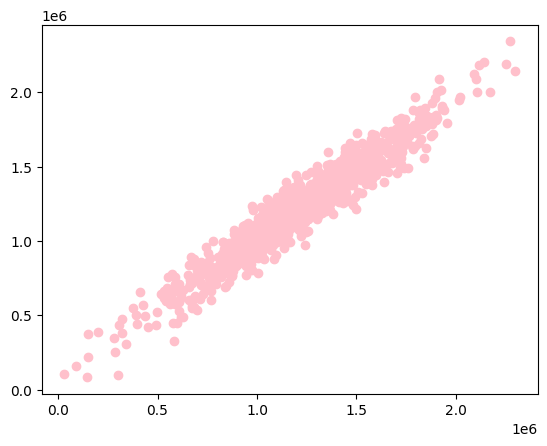

In [15]:
# ElasicNet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet 
from sklearn.metrics import r2_score
max_score=0;max_size=0;max_random=0
for i in np.arange(0.2,1,0.01):
    for j in range(0,100):
        X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=i,random_state=j)
        enet = ElasticNet(alpha=0.1)
        enet.fit(X_train,y_train)
        predictions=enet.predict(X_test)
        score = r2_score(y_test,predictions)
        if score>max_score:
            max_score=score
            max_random=j
            max_size=i
print('Max_score = {} : test_size = {:3} , random_state = {}'.format(max_score,max_size,max_random))
X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=max_size,random_state=max_random)
las.fit(X_train,y_train)
predictions=las.predict(X_test)
plt.scatter(y_test,predictions,color='pink')

In [55]:
# parameter test
max_score=0;max_size=0;max_random=0
X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=76)
for a in np.arange(0.1,1,0.05):
    enet = ElasticNet(alpha=a)
    enet.fit(X_train,y_train)
    predictions=enet.predict(X_test)
    score = r2_score(y_test,predictions)
    print('{:.2f} : {}'.format(a,score))

0.10 : 0.9269098708570991
0.15 : 0.9259483341138933
0.20 : 0.9247093243018043
0.25 : 0.9232383774803776
0.30 : 0.9215737942867664
0.35 : 0.919747917000226
0.40 : 0.9177881526774995
0.45 : 0.9157177995063168
0.50 : 0.9135567173795918
0.55 : 0.9113218776746516
0.60 : 0.9090278135965811
0.65 : 0.9066869931550623
0.70 : 0.9043101287453863
0.75 : 0.9019064357698633
0.80 : 0.8994838475979392
0.85 : 0.897049199874169
0.90 : 0.8946083826543229
0.95 : 0.8921664710906965


### Decision Tree Regression
參考自講義Intro to ML 上另一張選擇model的圖\
DecisionTreeRegressor的參數random_state，透過固定split參數找到最佳值為24\
故在調整split的參數test_size與Random_state時，將此設為24\
得出的最佳score僅有0.79，相較其他model效果較差\
由分散圖可知，其predictions與y_test的相關性較其他model的預測圖要差

Max_score = 0.7953159884962466 : test_size = 0.22000000000000003 , random_state = 6


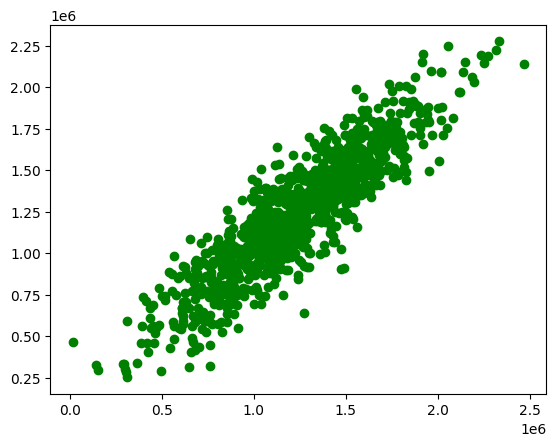

In [37]:
# Decistion Tree Regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
max_score=0;max_size=0;max_random=0
for i in np.arange(0.2,1,0.01):
    for j in range(0,100):
        X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=i,random_state=j)
        dtr = DecisionTreeRegressor(random_state=24)
        dtr.fit(X_train,y_train)
        predictions=dtr.predict(X_test)
        score = r2_score(y_test,predictions)
        if score>max_score:
            max_score=score
            max_random=j
            max_size=i
print('Max_score = {} : test_size = {:3} , random_state = {}'.format(max_score,max_size,max_random))
X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=max_size,random_state=max_random)
dtr.fit(X_train,y_train)
predictions=dtr.predict(X_test)
plt.scatter(y_test,predictions,color='green')


## Conclusion
透過以上幾種 regression model 得出最佳準確率大約為0.927777\
前三種model所得的準確度十分相近，但細看最佳model仍為linear regression\
而在嘗試各種參數調整後，ElasticNet仍然較其他要差一些\
最後的DecisionTreeRegression不論如何調整參數皆只有大約0.77的score
### Explaination
透過迴圈包迴圈的方式尋找有最佳表現的test_size與random_state。
#### 調整範圍
因考量到數據合理性問題，因此對調整範圍設限
> test_size : range(0.2, 1, 0.01)\
考慮到若設為低於0.2可能會造成該model的score失去參考價值，因此將lower bound設為0.2。\
有再另外測試，若將test_size設為0.1，確實能使score超過0.92；但此現象應該為測資太少所造成，我認為沒有太大的參考價值。\
> random_state : 0 ~ 100\
從預設的None測到100，因regression的model較迅速，所以無特別設定範圍。
### Observation
在調整參數的過程中，我發現不論使用何種model，當test_size=0.2 & Random_state=76 時都能最佳預測。\
**關於alpha值設定**
在嘗試其他model時，有另外對其參數alpha進行調整，發現其數值與score呈現反比：\
在data_split的參數固定下，alpha值愈大、則score愈小。\
因此最後選擇了以alpha=0.1進行預測。
### Reference
所有model使用方法與參數類型皆取自scikit_learn的網站\
model選擇的方法取自於112-1 ML的講義(Intro to ML)